In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
import datetime as dt

In [87]:
t1 = input('Enter Stock 1:')
t2 = input('Enter Stock 1:')

tickers = [str(t1),str(t2)]
start = dt.datetime(2020,3,17)
end = dt.datetime.now()
df = pd.DataFrame()
for t in tickers:
    data = yf.download(t,start,end)["Adj Close"]
    df[t] = data
df

Enter Stock 1:HDFCBANK.NS
Enter Stock 1:SBIN.NS
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,HDFCBANK.NS,SBIN.NS
Date,,
2020-03-17,948.857605,205.904724
2020-03-18,853.300476,205.952576
2020-03-19,871.448547,194.898895
2020-03-20,859.090332,200.832474
2020-03-23,750.785706,173.796417
...,...,...
2023-06-12,1600.800049,578.650024
2023-06-13,1603.500000,576.400024
2023-06-14,1601.750000,576.549988


<AxesSubplot:xlabel='Date'>

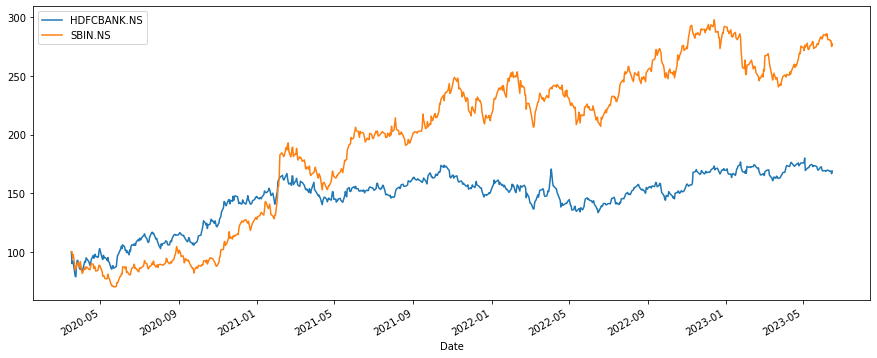

In [88]:
((df/df.iloc[0])*100).plot(figsize =(15,6))

In [89]:
log_returns = np.log(df/df.shift(1))

In [90]:
log_returns.corr()

,HDFCBANK.NS,SBIN.NS
HDFCBANK.NS,1.00000,0.54183
SBIN.NS,0.54183,1.00000


In [91]:
NOA = len(tickers)

In [117]:
portfolio_returns = []
portfolio_volatility = []

for x in range(1000):
    weights = np.random.random(NOA)
    weights /=np.sum(weights)
    portfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    portfolio_volatility.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights))))

In [118]:
df = pd.DataFrame({'Return': portfolio_returns,'Volatility': portfolio_volatility})

Text(0.5, 1.0, 'Efficient Frontier')

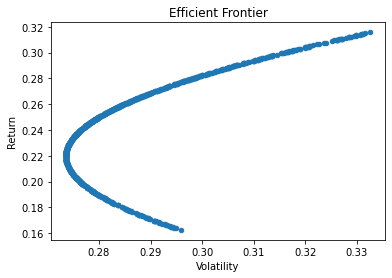

In [119]:
df.plot(x = 'Volatility',y = 'Return',kind = 'scatter')
plt.title('Efficient Frontier')

In [125]:
Minvar = min(df['Volatility'])
Minvar_return = df['Return'][df['Volatility'].idxmin()]
print('Global minimum variance portfolio is at',Minvar*100,'% and the return for this is',Minvar_return*100,'%')

Global minimum variance portfolio is at 27.35598471246487 % and the return for this is 21.969660367166483 %
